In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
#读取数据，处理数据
data = pd.read_csv("D:\桌面\Train.csv").sample(frac=1, random_state=0)

Text(0.5, 0, 'each iterm')

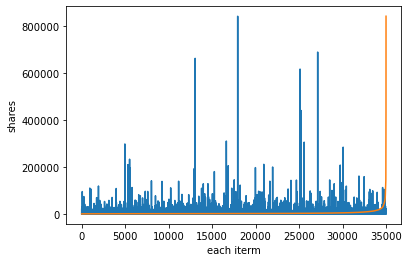

In [14]:
#展示shares分布
y = data.iloc[:, -1]
plt.plot(range(len(y)),y)
y_a= y.sort_values()
plt.plot(range(len(y)),y_a)
plt.ylabel("shares")
plt.xlabel("each iterm")

Text(0.5, 1.0, 'all')

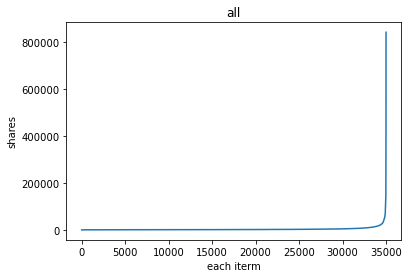

In [15]:
y_a= y.sort_values()
plt.plot(range(len(y)),y_a)
plt.ylabel("shares")
plt.xlabel("each iterm")
plt.title("all")

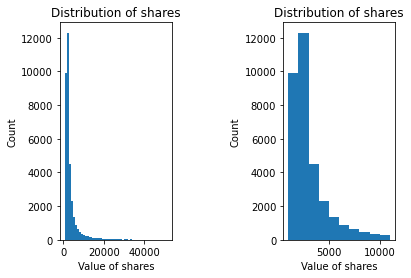

In [7]:
import numpy as np
import matplotlib.pyplot as plt
y=np.array(y_a)
# 划分区间
bins = np.arange(0, y.max() + 1000, 1000)
indices = np.digitize(y, bins)
# 统计每个区间的元素个数
counts = np.bincount(indices)
plt.subplot(1, 2, 1)
# 绘制柱状图
plt.bar(bins[1:51], counts[1:51], width=1000, align="edge")

# 添加图标题和坐标轴标签
plt.title("Distribution of shares")
plt.xlabel("Value of shares")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
plt.bar(bins[1:11], counts[1:11], width=1000, align="edge")

# 添加图标题和坐标轴标签
plt.title("Distribution of shares")
plt.xlabel("Value of shares")
plt.ylabel("Count")
plt.subplots_adjust(wspace=1)
# 显示图形
plt.show()

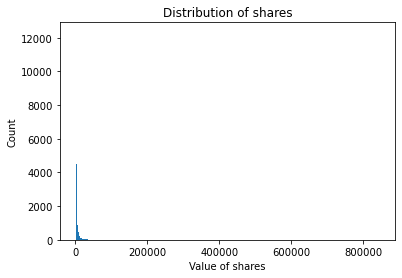

In [6]:
plt.bar(bins, counts, width=1000, align="edge")

# 添加图标题和坐标轴标签
plt.title("Distribution of shares")
plt.xlabel("Value of shares")
plt.ylabel("Count")
plt.show()

In [254]:
#统计shares数量，准备把明星帖子去除
print(sum(y>10000))
print(sum(y>1500))
print(sum(y>0))

1948
16172
35000


In [5]:
df=data

Text(0.5, 1.0, 'without exits 10000+')

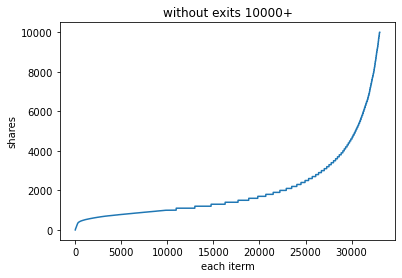

In [11]:
#把shares大于5000的都删除
rows_to_drop = data[data[' shares'] > 10000].index
df = data.drop(rows_to_drop)
y = df.iloc[:, -1]
y_a= y.sort_values()
plt.plot(range(len(y)),y_a)
plt.ylabel("shares")
plt.xlabel("each iterm")
plt.title("without exits 10000+")

In [ ]:
#测试大数的mape

In [191]:
#把shares大于5000的都删除
rows_to_drop = data[data[' shares'] >10000].index
da = data.drop(rows_to_drop)
#手动降维
da = da.drop([" n_non_stop_words"," weekday_is_monday"," weekday_is_tuesday"," weekday_is_wednesday"," weekday_is_thursday"," weekday_is_friday"
                ," weekday_is_saturday"," weekday_is_sunday"], axis=1)

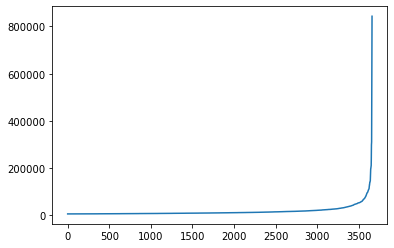

In [68]:
# 将训练数据和测试数据分开
Xa = da.iloc[:, :-1]
ya = da.iloc[:, -1]
y_a= ya.sort_values()
plt.plot(range(len(y_a)),y_a)

Xa = scaler.fit_transform(Xa)
# pca = PCA(n_components=5)
Xa = skb.transform(Xa)
Xa = pca.fit_transform(Xa)
Xa = scaler.fit_transform(Xa)

In [73]:
y_prea = lr_model.predict(Xa)
y_prea= np.where(y_prea > 0, 100*60, 100*9)

In [72]:
np.mean(np.abs((ya - y_prea) / ya)) * 100

78.58209636813737

In [6]:
#手动降维
df = df.drop([" n_non_stop_words"," weekday_is_monday"," weekday_is_tuesday"," weekday_is_wednesday"," weekday_is_thursday"," weekday_is_friday"
                ," weekday_is_saturday"," weekday_is_sunday"], axis=1)

In [7]:
# 将训练数据和测试数据分开
X = df.iloc[:, :-1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = df.iloc[:, -1]

In [16]:
# 卡方检验特征选择和PCA特征提取
skb = SelectKBest(chi2, k=30)
X_pca = skb.fit_transform(X_scaled, y)
# pca = PCA(n_components=5)
# X_pca = pca.fit_transform(X_new)
# X_pca = scaler.fit_transform(X_pca)

In [17]:
# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #把y值分为两类来进行预测
    y_binary = np.where(y_train > 1500,1,0)
    lr_model = LogisticRegression(max_iter=200)
    lr_model.fit(X_train, y_binary)
    #把预测值映射回去
    y_pred = lr_model.predict(X_test)
    print(y_pred.mean())
    y_pred= np.where(y_pred > 0, 100*12, 100*9)
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    print(np.mean(mape_list))

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

0.4025714285714286
51.6526938637362
0.3977142857142857
49.222211844263114
0.3934285714285714
52.447290869502275
0.42428571428571427
52.926222690436724
0.40714285714285714
52.30861663795374
0.39257142857142857
52.11160357427503
0.3922857142857143
55.401456598631334
0.4034285714285714
54.61328547342478
0.40914285714285714
53.77202223228637
0.39371428571428574
53.44595126452367
MAE: 2524.7359
RMSE: 11227.4504
MAPE: 53.4460%


In [ ]:
resul=[]
for i in range(1,40):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scaled)
    X_pca = scaler.fit_transform(X_pca)
    # 训练模型并进行十折交叉验证
    n_splits = 10
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    mae_list = []
    rmse_list = []
    mape_list = []
    for train_index, test_index in kf.split(X_pca):
        X_train, X_test = X_pca[train_index], X_pca[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #把y值分为两类来进行预测
        y_binary = np.where(y_train > 1500,1,0)
        lr_model = LogisticRegression(max_iter=200)
        lr_model.fit(X_train, y_binary)
        #把预测值映射回去
        y_pred = lr_model.predict(X_test)
        print(y_pred.mean())
        y_pred= np.where(y_pred > 0, 100*12, 100*9)
        mae_list.append(mean_absolute_error(y_test, y_pred))
        rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    resul.append(np.mean(mape_list))
plt.plot(range(resul),resul)

0.36228571428571427
0.3608571428571429
0.39
0.3777142857142857
0.37114285714285716
0.3942857142857143
0.3597142857142857
0.3702857142857143
0.4065714285714286
0.38571428571428573
0.26914285714285713
0.2725714285714286
0.2937142857142857
0.28285714285714286
0.2825714285714286
0.27
0.2742857142857143
0.2825714285714286
0.2957142857142857
0.2965714285714286
0.32542857142857146
0.334
0.3517142857142857
0.3434285714285714
0.3397142857142857
0.3325714285714286
0.3294285714285714
0.352
0.35742857142857143
0.35314285714285715
0.33057142857142857
0.3362857142857143
0.35714285714285715
0.34314285714285714
0.3502857142857143
0.33914285714285713
0.3382857142857143
0.352
0.3588571428571429
0.348
0.416
0.4134285714285714
0.416
0.43314285714285716
0.42542857142857143
0.39714285714285713
0.4014285714285714
0.4217142857142857
0.42457142857142854
0.4105714285714286
0.4174285714285714
0.4157142857142857
0.4174285714285714
0.43142857142857144
0.4188571428571429
0.396
0.40914285714285714
0.4162857142857142

Text(0, 0.5, 'mape')

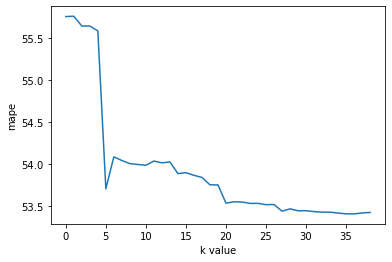

In [24]:

plt.plot(range(len(resul)),np.array(resul))
plt.xlabel("k value")
plt.ylabel("mape")

In [218]:
# 划分目标变量为多类
def classify_target(y):
    y_class = []
    for i in range(len(y)):
        if y.iloc[i] > 2500:
            y_class.append(3)
        elif y.iloc[i] > 1400:
            y_class.append(2)
        elif y.iloc[i] > 1000:
            y_class.append(1)
        else:
            y_class.append(0)
    return np.array(y_class)


# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # 划分目标变量为多类
    y_train_class = classify_target(y_train)
    # 训练模型并预测测试集数据
    lr_model = LogisticRegression(max_iter=100)
    lr_model.fit(X_train, y_train_class)
    y_pred_class = lr_model.predict(X_test)
    print(y_pred_class.max())
    # 映射预测值为目标变量值
    y_pred = np.where(y_pred_class == 3, 2000, np.where(y_pred_class == 2, 1400, np.where(y_pred_class == 1, 1000, 900)))
    # 计算评估指标
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    print(np.mean(mape_list))

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

3
52.20193782747028
3
53.27730519892074
3
53.98001585763163
3
61.20741910826921
3
59.35323715922948
3
58.2901855599468
3
57.07362056527448
3
58.62172478861746
3
57.71241407791086
3
57.09377575407143
MAE: 1123.9831
RMSE: 1921.1947
MAPE: 57.0938%


2